<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-RSS-Feed-Content-with-Topic-Identification" data-toc-modified-id="Analysis-of-RSS-Feed-Content-with-Topic-Identification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of RSS-Feed Content with Topic Identification</a></span><ul class="toc-item"><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Collection</a></span></li><li><span><a href="#Overview-of-Feed-Data" data-toc-modified-id="Overview-of-Feed-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Overview of Feed Data</a></span><ul class="toc-item"><li><span><a href="#Article-Sizes" data-toc-modified-id="Article-Sizes-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Article Sizes</a></span></li><li><span><a href="#Overview-of-Article-Authors" data-toc-modified-id="Overview-of-Article-Authors-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Overview of Article Authors</a></span></li><li><span><a href="#Tags-Specified-by-the-Feed-Publishers" data-toc-modified-id="Tags-Specified-by-the-Feed-Publishers-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Tags Specified by the Feed Publishers</a></span></li></ul></li><li><span><a href="#Identifying-Topics-within-the-Articles" data-toc-modified-id="Identifying-Topics-within-the-Articles-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Identifying Topics within the Articles</a></span></li><li><span><a href="#Using-Soft-Cosine-Similarity-to-Cluster-Stories" data-toc-modified-id="Using-Soft-Cosine-Similarity-to-Cluster-Stories-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Using Soft Cosine Similarity to Cluster Stories</a></span><ul class="toc-item"><li><span><a href="#LDA-Analysis-with-the-pyLDAvis-Visualization" data-toc-modified-id="LDA-Analysis-with-the-pyLDAvis-Visualization-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>LDA Analysis with the pyLDAvis Visualization</a></span></li></ul></li></ul></li></ul></div>

# Analysis of RSS-Feed Content with Topic Identification

## Data Collection

Data is collected from a wide range of RSS-Feeds..

In [166]:
%load_ext autoreload
%autoreload
import importlib
%aimport reader
#importlib.import_module("reader")
importlib.reload(reader)
importlib.reload(topicmap)
from reader import (loadAllFeedsFromFile, summarizeItems,getFeedDict,
                    collectArticles,summarizeByDate, summarizeFeeds)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


A large number of names and URLs of  compatible feeds are pre-defined in the convenience function getFeedDict. The user may however supply his/her own dictionary of feeds for subsequent processing

In [151]:
allFeeds=getFeedDict()
summarizeFeeds(allFeeds) 

,Source,Feed
0,Africa Launch Pad,https://africalaunchpad.com/feed/
1,Al Jazeera,http://www.aljazeera.com/xml/rss/all.xml
2,Annals Hub,https://annalshub.com/feed/
3,Article IFY,https://articleify.com/feed/
4,BBC News,http://feeds.bbci.co.uk/news/rss.xml
5,Baltic World,https://balticword.eu/feed/
6,Buzzfeed,https://www.buzzfeed.com/world.xml
7,CNBC,https://www.cnbc.com/id/100727362/device/rss/rss.html
8,Christian Science Monitor,https://rss.csmonitor.com/feeds/world
9,Daily CN News,https://dailycnnews.com/feed/


In [3]:
feedDict={'NY Times': 'https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml', 'Buzzfeed': 'https://www.buzzfeed.com/world.xml', 'Al Jazeera': 'http://www.aljazeera.com/xml/rss/all.xml', 'Defence Blog': 'http://defence-blog.com/feed', 'Global Issues': 'http://www.globalissues.org/news/feed'}
#collectArticles(allFeeds) 
collectArticles(feedDict) # TODO remopve after testing

NY Times
Buzzfeed
Al Jazeera
Defence Blog
Global Issues



'rssreader/data/feed22052020_185121.pickle'

In [107]:
allDict=loadAllFeedsFromFile()

loading file:  rssreader/data\feed13052020_131506.pickle
loading file:  rssreader/data\feed14052020_094346.pickle
loading file:  rssreader/data\feed14052020_212147.pickle
loading file:  rssreader/data\feed15052020_144203.pickle
loading file:  rssreader/data\feed16052020_010028.pickle
loading file:  rssreader/data\feed16052020_124115.pickle
loading file:  rssreader/data\feed16052020_205529.pickle
loading file:  rssreader/data\feed17052020_212707.pickle
loading file:  rssreader/data\feed20052020_165659.pickle
loading file:  rssreader/data\feed20052020_221210.pickle
loading file:  rssreader/data\feed21052020_202505.pickle
loading file:  rssreader/data\feed22052020_135635.pickle
loading file:  rssreader/data\feed22052020_173323.pickle


## Overview of Feed Data

In [125]:
summarizeItems(allDict)

### Article Sizes

Let's take a look at the sizes of the articles over time and from the various feeds

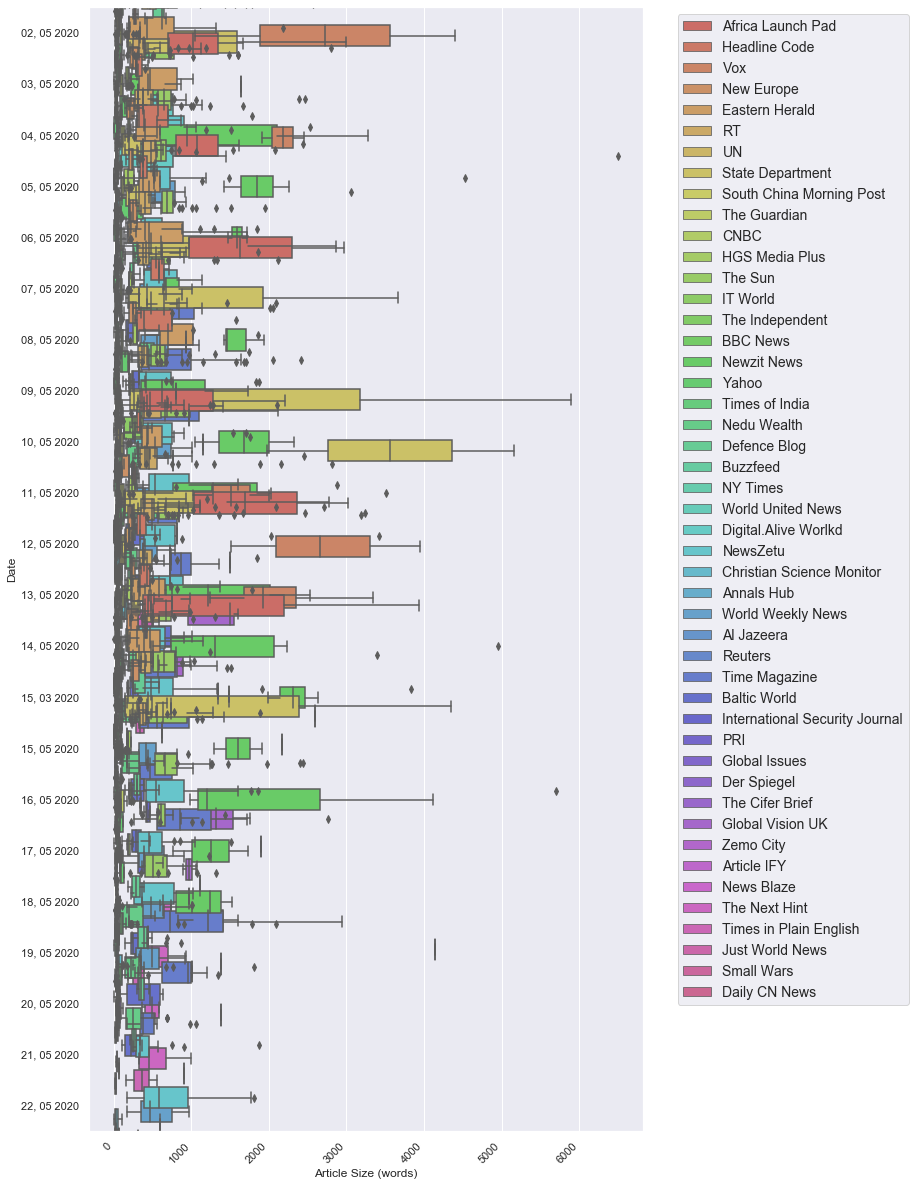

In [112]:
importlib.reload(reader)
summarizeByDate(allDict)

### Overview of Article Authors

In [7]:
#importlib.import_module("samples.seabornScatterPlots") # TODO move to base directory, not samples
%aimport samples.seabornScatterPlots 
from samples.seabornScatterPlots import displayTopics,displayAuthors,displayTags

With author: 5312 Without author: 3613


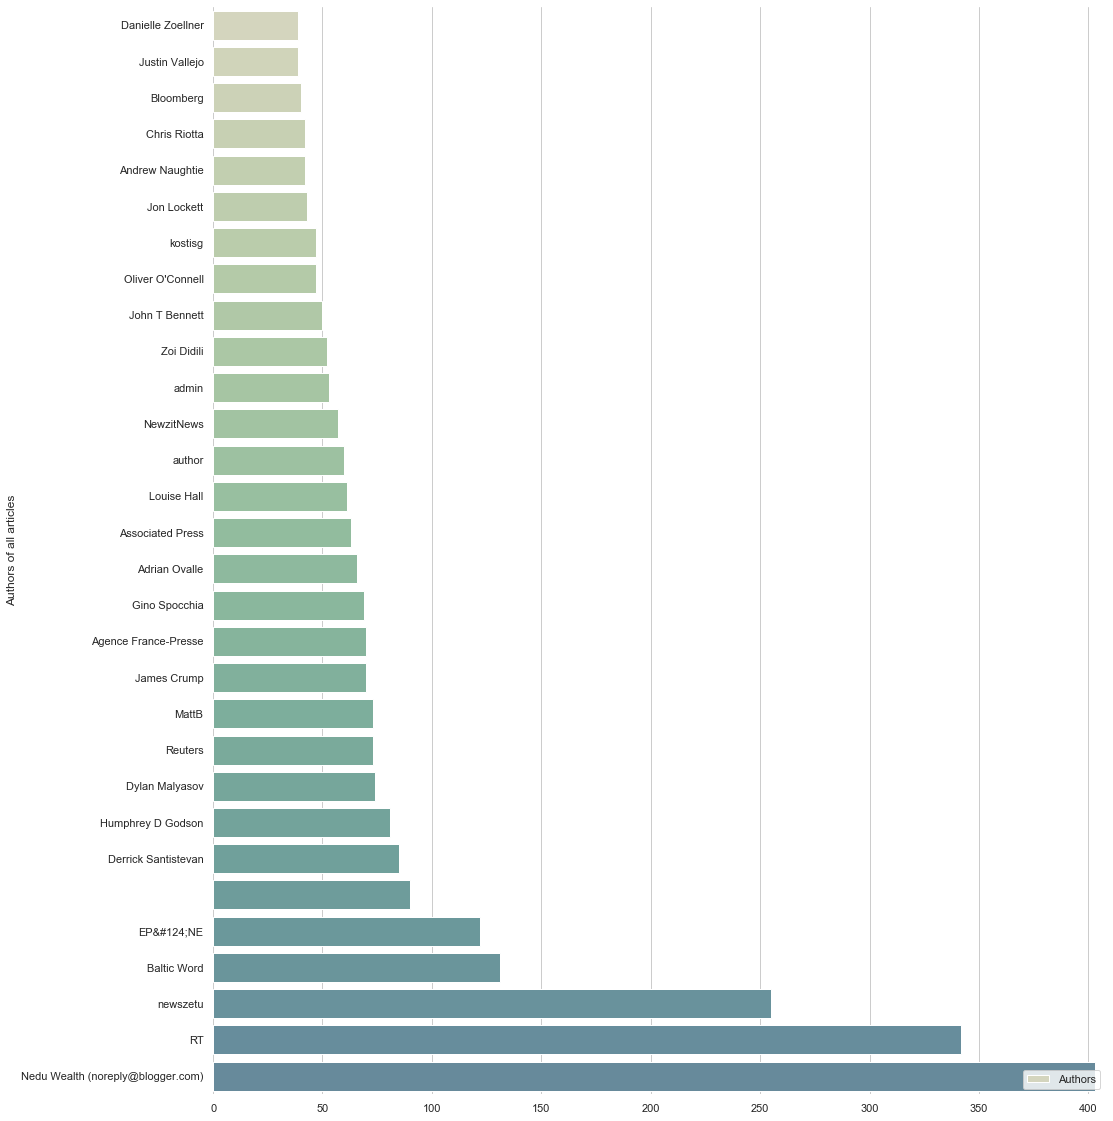

In [8]:
displayAuthors(dict=allDict)

### Tags Specified by the Feed Publishers


There were 3736 articles with tags and 5442 without tags


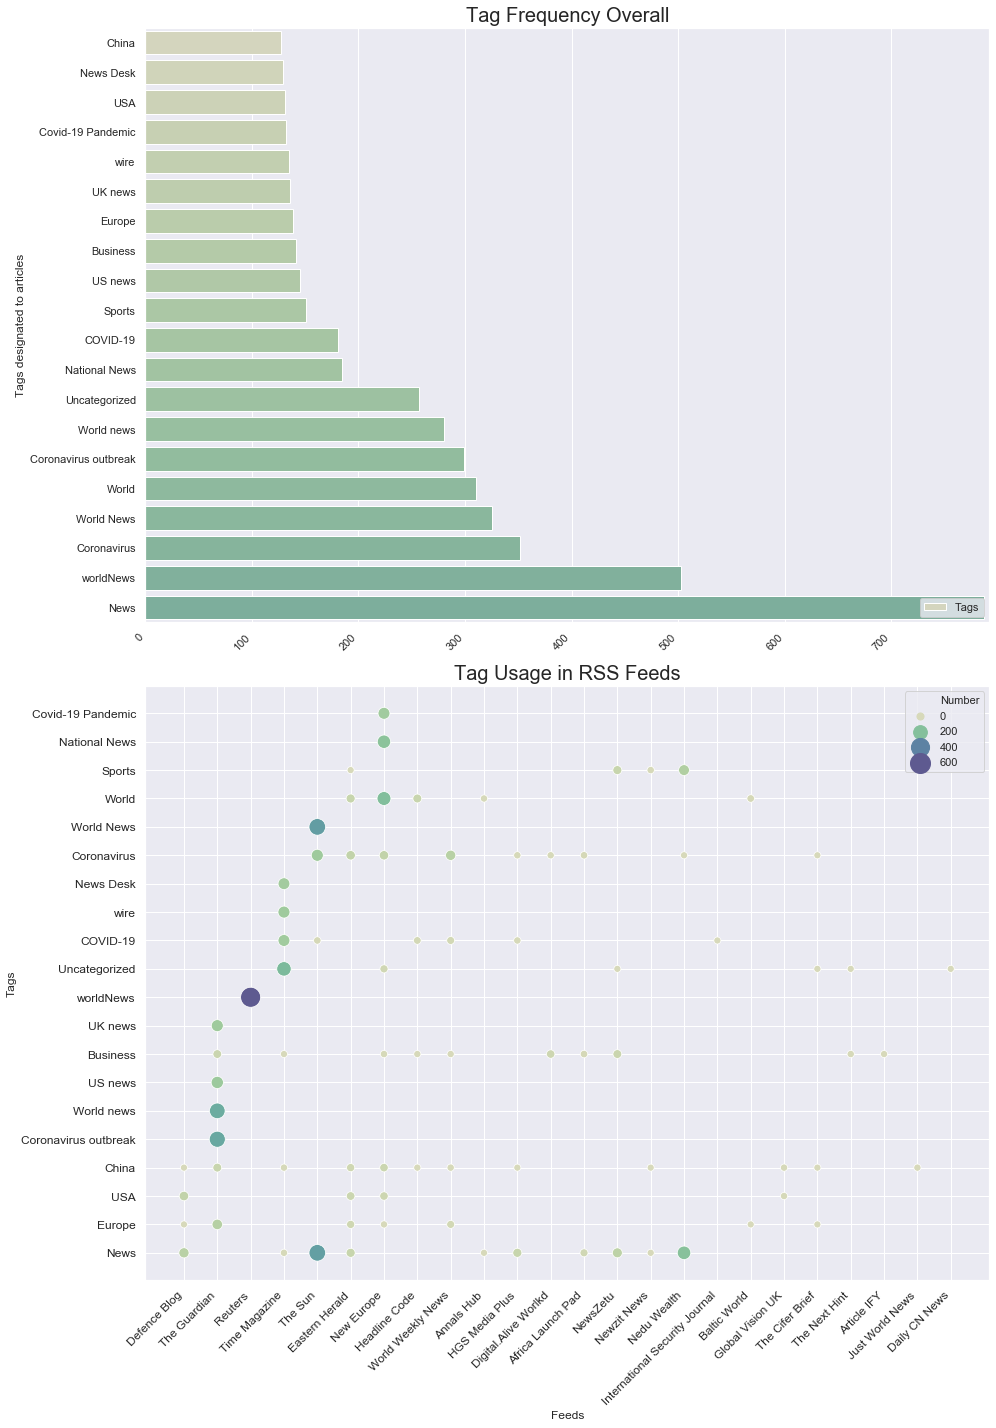

In [205]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(8,10))
#allDict=loadAllFeedsFromFile()
%aimport samples.seabornScatterPlots
importlib.reload(reader)
importlib.reload(samples.seabornScatterPlots)
from samples.seabornScatterPlots import displayTags
displayTags(allDict, displayAmount=20)

## Identifying Topics within the Articles

In [10]:
#importlib.import_module("topicmap")
%aimport topicmap
importlib.reload(topicmap)
from topicmap import displayTopicsAndFeeds,getDocList, getAllTopics,getCustomStopWords, deriveTopicMaps, updateDictionaryByFuzzyRelevanceofTopics
from topicmap import doStandardInitialize,getAllFeedTopics

In [11]:
docContentList=getDocList(allDict, reloaddocs=False,stop_list=getCustomStopWords())
topics= deriveTopicMaps(docContentList, maxNum=40, ngram_range=(3,3))

Function updateDictionaryByFuzzyRelevanceofTopics:

Add list of topics to each entry of the given allEntryDict for each topic that has a fuzzy relevance of greater than the specified threshold, which can be changed here, as required

removal of 200522135430191 not possible
removal of 200522135430191 not possible
removal of 200522135430191 not possible
removal of 200522135430191 not possible

There were 1671 items with topics and 0 without topics
These are the 20 most frequent topics used:
 [('latest updatessee coronavirus', 1235), ('new coronavirus cases', 644), ('ourcoronavirus latest news', 157), ('read ourcoronavirus latest', 152), ('world health organisation', 147), ('world health organization', 143), ('president donald trump', 136), ('first onisj international', 121), ('social distancing measures', 104), ('social distancing rules', 83), ('state department official', 74), ('us president donald', 68), ('international security journal', 63), ('onisj international security', 52), ('senior state department', 50), ('president xi jinping', 41), ('covid 19 outbreak', 35), ('first onworld weekly', 34), ('onworld weekly news', 30), ('covid 19 pandemic', 30)]


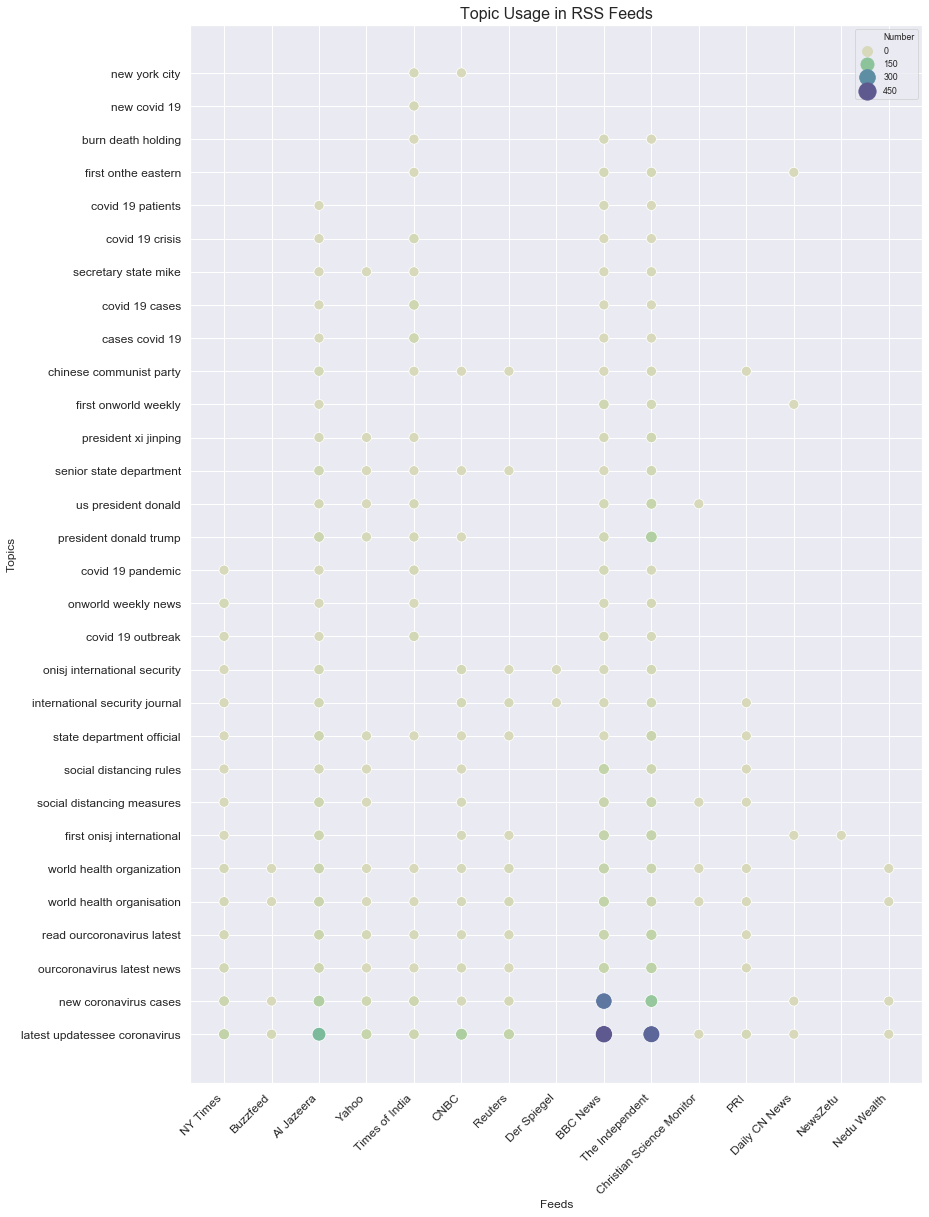

In [12]:
updateDictionaryByFuzzyRelevanceofTopics(topics,allDict, limit=None, threshold=60, remove=True)
displayTopicsAndFeeds(allDict)

Mausi explains the scatterplot ..... TODO

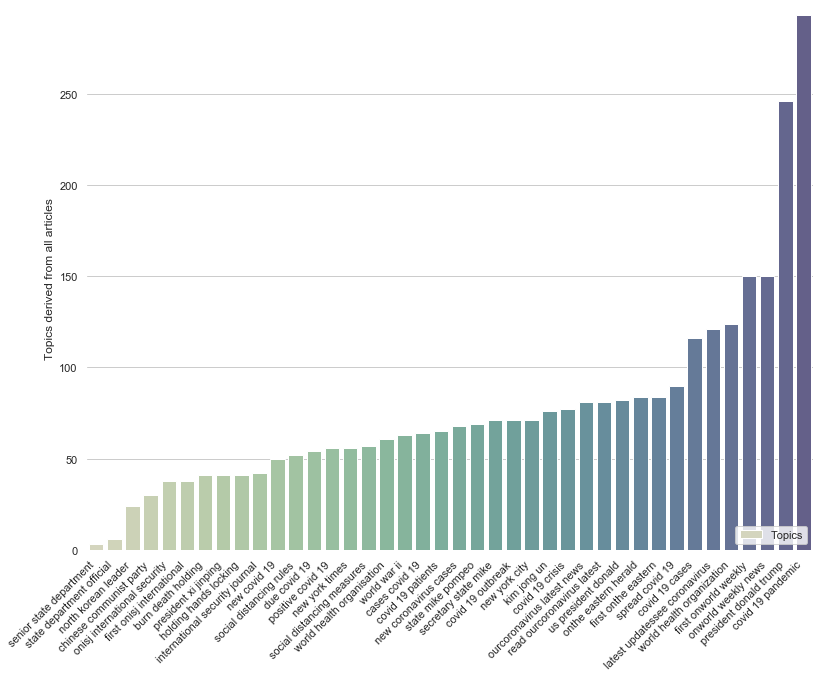

In [13]:
displayTopics(topics)

Clearly the overwhelmingly most prevalent topic (in May 2020) is the coronavirus pandemic (Covid-19). Not only as the main story of the day (and of the month and year), but also spurning dozenzs of other sub-stories emanating from the Covid-19 crisis. Etc ....

## Using Soft Cosine Similarity to Cluster Stories

TODO: reformulate the following
Get docs from file, get list of titles+content, calculate (40) topics using 3,4 ngrams map topics Add list of topics to each entry of the given allEntryDict for each topic that has an LDA fuzzy relevance (see fuzzywuzzy process) of greater than the specified threshold. Calculate SoftCosine-Similarity matrix with WordEmbeddings fasttext_model300 (dimension 300) or GloVe (dimension 50) save matrix to file do spectral analysis and dimension reduction (PCA method) on similarity matrix  plotScatter3D with tool tips.
The sizes of the spheres in the plot are scaled to the degree of cosine similarity for the article in relation to the cluster.

In [86]:
%aimport Gensim.gensim_test
importlib.reload(Gensim.gensim_test)
from Gensim.gensim_test import deriveSoftCosineSimilarityMatrix,test3DPlotOfCosineSimilarity ,showPyLDAvis, saveDFPickle

In [34]:
matrix=deriveSoftCosineSimilarityMatrix(allDict)
saveDFPickle(matrix) # TODO remove or make saved result more useful (reusable)

Now that the similarity matrix has been calculated it is very quick and easy to produce additional plots. For instance with a higher threshold, thus filtering out less significant articles or specifying a different number of topics to color-code

In [103]:
test3DPlotOfCosineSimilarity(allDict,matrix=matrix,numTopics=20, threshold=0.6)

In [162]:
importlib.reload(Gensim.gensim_test)
test3DPlotOfCosineSimilarity(allDict,matrix=matrix,numTopics=20, threshold=0.65)

200522150544665 not found
200522143909314 not found


### LDA Analysis with the pyLDAvis Visualization

Mausi explains LDA and what pyLDAvis is displaying .... TODO

In [42]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
output_notebook()

In [174]:
%%time
importlib.reload(reader)
importlib.reload(Gensim.gensim_test)
from topicmap import smallDict
showPyLDAvis(smallDict(allDict,400), numTopics=10)


Wall time: 7min 38s
